# Mengimport Library yang Digunakan

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Pandas: Untuk membaca, mengolah, dan menganalisis data (misalnya, pd.read_csv(), df.info()).
- NumPy: Untuk komputasi numerik
- Matplotlib: Untuk membuat visualisasi dasar (misalnya, plt.figure(), plt.show()).
- Seaborn: Untuk visualisasi yang lebih menarik dan informatif (misalnya, sns.boxplot()

# Membaca File CSV

In [226]:
# Membaca data dari file CSV  ke dalam DataFrame
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Melihat Informasi Dataset

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Menampilkan 10 Record Pertama Dataset

In [188]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


# 1. Data Cleaning

## Handling Missing Value (Nilai Null)

In [102]:
# Memeriksa Jumlah Nilai Null
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [227]:
# Mengganti NaN dengan 'No Disorder' dalam kolom "Sleep Disorder"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

# Memeriksa nilai unik yang diperbarui untuk memastikan penggantian berhasil
updated_unique_values = df['Sleep Disorder'].unique()
print(updated_unique_values)

# Mmeriksa Jumlah Nilai Null
df.isnull().sum()

['No Disorder' 'Sleep Apnea' 'Insomnia']


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


- Menggunakan Nilai Default

  Saya memilih untuk mengganti nilai NaN di kolom "Sleep Disorder" dengan "No Disorder" karena:

  1. Kejelasan: Dengan mengganti NaN menjadi "No Disorder," jadi lebih jelas bahwa orang tersebut tidak memiliki gangguan tidur.

  2. Konsistensi: Semua data akan terlihat sama, sehingga lebih mudah untuk dianalisis.

  3. Menjaga Data: Saya tidak ingin kehilangan banyak data. Dengan mengganti nilai yang hilang, saya tetap bisa menggunakan semua baris yang ada.

  4. Relevansi: Informasi ini penting untuk analisis kesehatan tidur, karena menunjukkan bahwa tidak semua orang memiliki masalah tidur.

  4. Mudah Dipahami: Istilah "No Disorder" lebih mudah dimengerti oleh semua orang yang melihat data, jadi hasil analisis bisa lebih jelas.

## Handling Duplikat Value (Nilai Duplikat)

In [73]:
duplicate = df.duplicated().sum()
print("jumlah data yang duplikat = ", duplicate)

jumlah data yang duplikat =  0


## Handling Outlier

Text(0.5, 1.0, 'Histogram of Heart Rate')

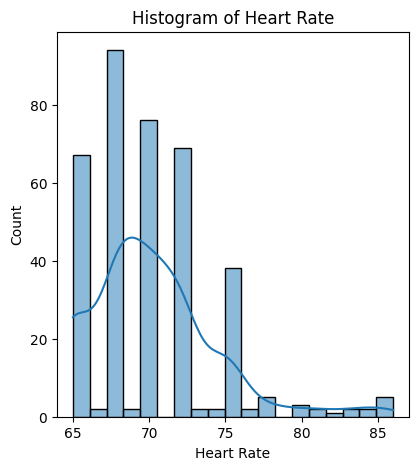

In [220]:
# Memeriksa Ditribusi data pada kolom 'Heart Rate'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Heart Rate'], kde=True)
plt.title("Histogram of Heart Rate")

- Distribusi 'Heart Rate' pada histogram ini tidak normal dan cenderung skewed ke kanan (right-skewed), dengan mayoritas nilai berada di rentang 65 hingga 72.5, sementara ada beberapa outlier di rentang yang lebih tinggi di atas 75.

Berdasarkan hasil distribusi data diatas, dapat disimpulkan bahwa:

- Metode IQR : Metode ini sangat cocok karena distribusi data ini tidak normal. Metode IQR cocok untuk digunakan karena lebih mengandalkan posisi relatif nilai dalam data dan tidak terpengaruh oleh rata-rata atau standar deviasi.
- Metode Z-Core : Metode ini kurang cocok karena Z-score bekerja lebih baik jika distribusi data mendekati distribusi normal (bell curve), karena Z-score mengasumsikan simetri dalam distribusi data, sehingga dengan mengggunakan metode ini tidak akan menghapus semua outlier

<Axes: ylabel='Heart Rate'>

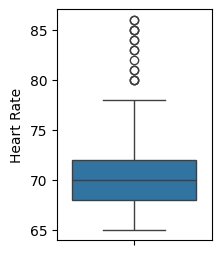

In [228]:
# Melakukan pengecekan outlier menggunakan boxplot
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(df['Heart Rate'])

- Berdasarkan visualisasi dengan menggunakan Gafik Box Plot, pada kolom 'Heart Rate' terlihat adanya data outlier yang signifikan
- Titik-titik di atas whisker atas menunjukkan outliers, atau data yang jauh di atas rentang normal. Pada gambar, terdapat sejumlah outlier di atas angka 80 bpm. Kehadiran outlier ini mengindikasikan bahwa beberapa nilai 'Heart Rate' sangat berbeda dari mayoritas data lainnya

### Metode IQR

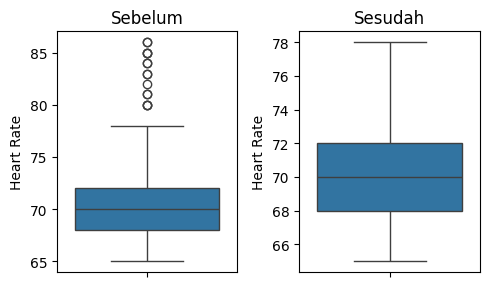

In [229]:
from scipy import stats

# Sebelum handling outlier
fig, axes = plt.subplots(1, 2, figsize=(5, 3))
plt.tight_layout()
sns.boxplot(df['Heart Rate'], orient='v', ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menghitung Q1, Q3, dan IQR
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1  # Hitung IQR dengan benar

# Menghapus outlier
df_filtered = df[~((df['Heart Rate'] < (Q1 - 1.5 * IQR)) | (df['Heart Rate'] > (Q3 + 1.5 * IQR)))]

# Setelah handling outlier
sns.boxplot(df_filtered['Heart Rate'], orient='v', ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()


Berdasarkan visualisasi gambar diatas:
- Distribusi lebih rapat: Setelah outlier dihapus, distribusi data menjadi lebih rapat tanpa ada titik-titik yang menonjol di luar whiskers. Ini menunjukkan bahwa nilai ekstrem telah berhasil dihilangkan.
- Konsistensi data: Penghapusan outlier memastikan bahwa data lebih representatif terhadap mayoritas distribusi, sehingga boxplot lebih stabil dan simetris.
- Skala lebih kecil: Sumbu Y pada boxplot kedua lebih kecil dengan rentang nilai berkisar antara 68 hingga 72 bpm, karena distribusi data lebih sempit di sekitar nilai median 70 bpm.


### Metode Z-Core

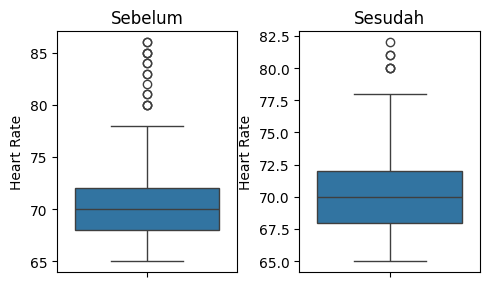

In [230]:
from scipy import stats

# Sebelum handling outlier
fig, axes = plt.subplots(1, 2, figsize=(5, 3))
plt.tight_layout()
sns.boxplot(df['Heart Rate'], orient='v', ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menghitung Z-Score
z_scores = np.abs(stats.zscore(df['Heart Rate']))

# Menghapus outlier dengan threshold Z-Score < 3
df_filtered = df[z_scores < 3]  # Simpan hasil filter dalam DataFrame baru

# Setelah handling outlier
sns.boxplot(df_filtered['Heart Rate'], orient='v', ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()


Berdasarkan Visualisasi gambar diatas:
- Distribusi lebih rapat: Setelah penanganan outlier, distribusi data menjadi lebih terkonsentrasi, meskipun masih ada beberapa outlier di atas whiskers. Outlier ini berada di kisaran 77.5 hingga 82.5 pada boxplot, yang mungkin tidak dianggap cukup ekstrem untuk dihapus oleh Z-score.

- Konsistensi data: Penghapusan outlier membuat distribusi lebih representatif terhadap mayoritas data, tetapi boxplot belum sepenuhnya simetris karena distribusi awal yang skewed ke kanan.

- Skala lebih kecil: Rentang nilai pada boxplot kedua berkisar antara 67.5 hingga 72.5 bpm, dengan median di sekitar 70 bpm, menunjukkan distribusi data yang lebih sempit

# 2. Data Transformation

In [231]:
# Menghapus kolom 'id' dari DataFrame
df = df.drop(columns=['Person ID'])

## Normalisasi kolom numerik

In [232]:
from sklearn.preprocessing import MinMaxScaler

#Menginisialisasi Min Max Scaller
scaler = MinMaxScaler(feature_range=(0,1))

#Numerical Columns
num_col_ = [col for col in df.columns if
df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]

#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,0.00000,0.111111,0.4,0.2,0.6,0.571429,0.171429
1,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000
2,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000
3,0.03125,0.037037,0.0,0.0,1.0,0.952381,0.000000
4,0.03125,0.037037,0.0,0.0,1.0,0.952381,0.000000


- Dalam kode ini, kolom-kolom yang dinormalisasi (kolom numerik) berasal dari DataFrame dan disimpan dalam variabel num_col_. Kolom-kolom tersebut adalah semua kolom yang memiliki tipe data numerik
- Dengan menggunakan MinMaxScaler, semua nilai dalam kolom tersebut akan berada dalam rentang 0 hingga 1, yang meningkatkan konsistensi dan efisiensi model dalam analisis data atau pelatihan model.

## Standarisasi kolom Numerik

In [233]:
from sklearn.preprocessing import StandardScaler

#Menginisialisasi Min Max Scaller
scaler = StandardScaler()

#Numerical Columns
num_col_ = [col for col in df.columns if
df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]

#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273


- Dengan menggunakan StandardScaler, setiap fitur numerik dalam DataFrame distandarisasi sehingga memiliki rata-rata 0 dan deviasi standar 1.
- Kolom-kolom yang dinormalisasi menggunakan StandardScaler akan mencakup semua kolom numerik dalam DataFrame. Dengan begitu, hasil dari x1 akan berisi nilai-nilai yang telah distandarisasi untuk kolom-kolom tersebut, siap digunakan untuk analisis lebih lanjut atau pelatihan model.

## Encoding kolom kategorikal

In [193]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### One Hot Encoding

In [225]:
# Menggunakan pd.get_dummies untuk mengonversi kolom "Gender" menjadi representasi one-hot encoding
enc = pd.get_dummies(df[["Gender"]])

# Menambahkan kolom hasil one-hot encoding ke dataframe asli
df = df.join(enc)

# Menampilkan hasil
df.head(10)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_Female,Gender_Male
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,False,True
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,False,True
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,False,True
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,False,True
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,False,True
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,False,True
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,False,True
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,False,True
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,False,True
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,False,True


In [216]:
# Menggunakan pd.get_dummies untuk mengonversi kolom "Sleep Disorder" menjadi representasi one-hot encoding
enc = pd.get_dummies(df[["Sleep Disorder"]])

# Menambahkan kolom hasil one-hot encoding ke dataframe asli
df = df.join(enc)

# Menampilkan hasil
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder_Insomnia,Sleep Disorder_No Disorder,Sleep Disorder_Sleep Apnea
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,False,True,False
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,False,True,False
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,False,True,False
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,False,False,True
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,False,False,True
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,True,False,False
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,True,False,False
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,False,True,False
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,False,True,False
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Disorder,False,True,False


Fungsi pd.get_dummies() untuk mengonversi kolom "Gender" menjadi representasi one-hot encoding. Setiap kategori (misalnya, "Male" dan "Female") akan diwakili oleh kolom baru dengan nilai 0 atau 1.

- Kolom "Gender" dan "Sleep Disorder" cocok untuk one-hot encoding karena keduanya merupakan variabel kategorikal yang tidak memiliki urutan.
- "Gender" terdiri dari kategori seperti "Male" dan "Female," yang menunjukkan jenis kelamin tanpa hubungan ordinal di antara mereka.
- "Sleep Disorder" mencakup kategori seperti "No Disorder" dan "Sleep Apnea," yang menunjukkan status kesehatan tanpa tingkatan.

Menggunakan one-hot encoding pada kedua kolom ini akan memungkinkan model untuk memproses informasi tersebut secara efektif, tanpa risiko menyimpulkan bahwa ada urutan atau hubungan numerik antara kategori.

### Ordinal Encoding

In [234]:
from sklearn.preprocessing import OrdinalEncoder

# Membuat objek OrdinalEncoder
encoder = OrdinalEncoder()

# Mengubah kolom "BMI Category" menjadi format numerik
df["BMI Category"] = encoder.fit_transform(df[["BMI Category"]])

# Menampilkan hasil
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,3.0,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,0.0,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,0.0,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,2.0,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,2.0,140/90,85,3000,Sleep Apnea


In [235]:
from sklearn.preprocessing import OrdinalEncoder

# Membuat objek OrdinalEncoder
encoder = OrdinalEncoder()

# Mengubah kolom "Blood Pressure" menjadi format numerik
df["Blood Pressure"] = encoder.fit_transform(df[["Blood Pressure"]])

# Menampilkan hasil
df.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,3.0,11.0,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,0.0,9.0,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,0.0,9.0,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,2.0,22.0,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,2.0,22.0,85,3000,Sleep Apnea


- Penggunaan OrdinalEncoder untuk mengonversi kolom BMI Category dan Blood Pressure ke format numerik. Kategori diwakili oleh angka sesuai urutannya, seperti "Underweight," "Normal," "Overweight," dan "Obese" untuk BMI, serta "Normal," "Elevated," dan "High" untuk tekanan darah.

- Alasan Pemilihan Kolom: Kedua kolom memiliki urutan yang jelas dan relevan, sehingga penggunaan OrdinalEncoder sangat sesuai. Ini memungkinkan model untuk memproses informasi dengan mempertahankan hubungan ordinal antar kategori.

# 3. Feature engineering

In [199]:
# Membuat kategori berdasarkan Heart Rate
# batas heart rate
heart_rate_bins = [0, 60, 80, 100, 120]

# nama kategori
heart_rate_labels = ['Low', 'Normal', 'Elevated', 'High']

# Menggunakan cut untuk mengkategorikan
df['Heart Rate Group'] = pd.cut(df['Heart Rate'], bins=heart_rate_bins, labels=heart_rate_labels)

# Lihat hasilnya
df[['Heart Rate', 'Heart Rate Group']].head(10)

,Heart Rate,Heart Rate Group
0,77,Normal
1,75,Normal
2,75,Normal
3,85,Elevated
4,85,Elevated
5,85,Elevated
6,82,Elevated
7,70,Normal
8,70,Normal
9,70,Normal


- Kode ini mengkategorikan nilai Heart Rate dalam dataframe menjadi empat kelompok: "Low", "Normal", "Elevated", dan "High" berdasarkan batas yang telah ditentukan. Dengan menggunakan fungsi pd.cut, setiap nilai Heart Rate akan dikelompokkan sesuai dengan kategori yang relevan

- Kolom Heart Rate digunakan pada fiture engineering karena berfungsi sebagai indikator kesehatan yang penting untuk menilai kondisi jantung  Dengan mengkategorikan nilai Heart Rate, kita dapat dengan mudah mengidentifikasi risiko kesehatan dari nilai yang ekstrem, serta melakukan analisis tren untuk melihat perbandingan persentase individu dalam kategori dari waktu ke waktu. Kategori seperti "Low", "Normal", "Elevated", dan "High" membuat data lebih mudah dipahami dan membantu dalam merencanakan tindakan kesehatan yang sesuai.

# 4. Data Splitting

In [201]:
from sklearn.model_selection import train_test_split

# Subset feature dan target
X = df.iloc[:,:-1] # Target
y = df.iloc[:,-1] # Feature

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

#Melihat Dimensi Data X, y Train dan Test
print('Dimensi X train: ', X_train.shape)
print('Dimensi X test: ', X_test.shape)
print('Dimensi y train: ', y_train.shape)
print('Dimensi y test: ', y_test.shape)

Dimensi X train:  (299, 15)
Dimensi X test:  (75, 15)
Dimensi y train:  (299,)
Dimensi y test:  (75,)


Kode ini menggunakan train_test_split dari scikit-learn untuk membagi dataset menjadi data pelatihan (80%) dan pengujian (20%). Fitur diambil dari semua kolom kecuali kolom terakhir, sedangkan kolom terakhir digunakan sebagai target. Dengan menggunakan random_state=42, pembagian data menjadi konsisten setiap kali kode dijalankan.

Kesimpulan :
- Dimensi X train menunjukkan terdapat 712 baris dan 5 kolom untuk fitur pelatihan.
- Dimensi X test menunjukkan terdapat 178 baris dan 5 kolom untuk fitur pengujian.
- Dimensi y train menunjukkan terdapat 712 nilai pada target untuk pelatihan.
- Dimensi y test menunjukkan terdapat 178 nilai pada target untuk pengujian.